In [386]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

In [387]:
# prices_sol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/SOLUSDT_2025_1m.csv')
# prices_bnsol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/BNSOLUSDT_2025_1m.csv')



In [388]:
# merge_ohlc_closing_prices('binance_data/ETH_and_WBETH/2024/1m')

# Get Data 
---

 * ## Closing price data


In [389]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

 * ## Order book data


In [390]:
# #BTC and WBTC
# #-------------------------------------------
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

#ETH and WBETH
prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)


In [391]:
prices

,eth_mid_price,eth_ask_price,eth_bid_price,eth_ask_liquidity,eth_bid_liquidity,wbeth_mid_price,wbeth_ask_price,wbeth_bid_price,wbeth_ask_liquidity,wbeth_bid_liquidity
local_timestamp,,,,,,,,,,
2024-06-01 00:00:00,3765.885,3765.89,3765.88,193927.894851,31512.883840,3916.525,3916.53,3916.52,386.953164,14.491124
2024-06-01 00:01:00,3763.005,3763.01,3763.00,202696.415155,38381.847400,3912.750,3914.47,3911.03,659.196748,49.670081
2024-06-01 00:02:00,3764.515,3764.52,3764.51,47464.573968,49396.394416,3915.350,3915.42,3915.28,9.788550,11.354312
2024-06-01 00:03:00,3765.815,3765.82,3765.81,187054.304712,25684.707105,3916.765,3917.23,3916.30,229.549678,49.737010
2024-06-01 00:04:00,3766.675,3766.68,3766.67,15112.673496,159224.297573,3918.100,3918.32,3917.88,170.446920,62.686080
...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,3341.735,3341.74,3341.73,51280.671170,174801.217878,3534.665,3535.72,3533.61,405.547084,120.142740
2024-12-31 23:56:00,3340.645,3340.65,3340.64,50916.516975,36937.456480,3533.665,3534.77,3532.56,405.438119,2720.071200
2024-12-31 23:57:00,3339.345,3339.35,3339.34,87570.780465,16380.464502,3532.305,3533.44,3531.17,405.285568,2815.754958


In [392]:
# Only show mid prices
#prices = prices[['btc_mid_price', 'wbtc_mid_price']]

prices = prices[['eth_mid_price','wbeth_mid_price']]

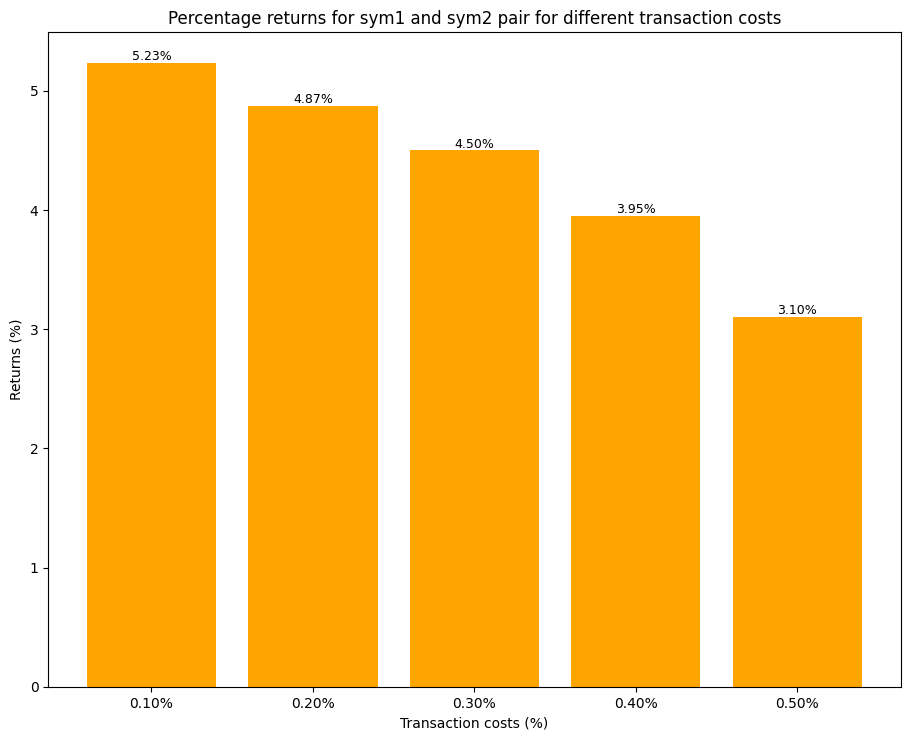

In [426]:
percentage_returns_list_transaction_costs = {
    0.001: 5.23,
    0.002: 4.87,
    0.003: 4.50,
    0.004: 3.95,
    0.005: 3.10
}



plt.figure(figsize=(11, 8.5))

# Prepare data
x_labels = [f"{key * 100:.2f}%" for key in percentage_returns_list_transaction_costs.keys()]
heights = list(percentage_returns_list_transaction_costs.values())

# Create bar plot
bars = plt.bar(x_labels, heights, color='orange')
plt.xlabel('Transaction costs (%)')
plt.ylabel('Returns (%)')
plt.title(f'Percentage returns for {"sym1"} and {"sym2"} pair for different transaction costs')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=9)




In [393]:
prices

,eth_mid_price,wbeth_mid_price
local_timestamp,,
2024-06-01 00:00:00,3765.885,3916.525
2024-06-01 00:01:00,3763.005,3912.750
2024-06-01 00:02:00,3764.515,3915.350
2024-06-01 00:03:00,3765.815,3916.765
2024-06-01 00:04:00,3766.675,3918.100
...,...,...
2024-12-31 23:55:00,3341.735,3534.665
2024-12-31 23:56:00,3340.645,3533.665
2024-12-31 23:57:00,3339.345,3532.305


In [394]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [395]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [396]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [397]:
#Params:
window_size = 1440
entry_threshold= 2.5
exit_threshold= 0
stop_loss_threshold = 4

In [398]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)




Testing strategy on pair: eth_mid_price and wbeth_mid_price ...
Total trades closed: 2739 (Wins=2594, Losses=145)
Win rate: 0.95


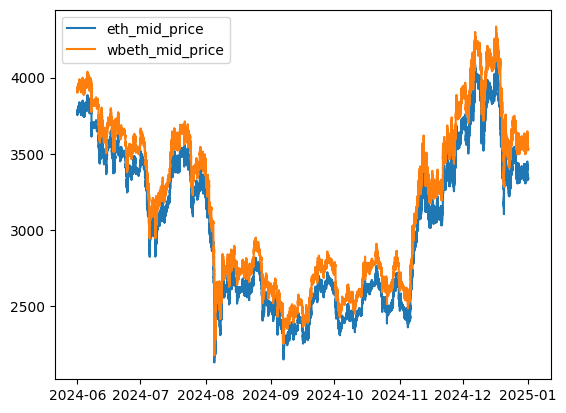

In [399]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

plt.plot(prices[crypto_1], label=crypto_1)
plt.plot(prices[crypto_2], label=crypto_2)
plt.legend(loc='upper left')
plt.show()






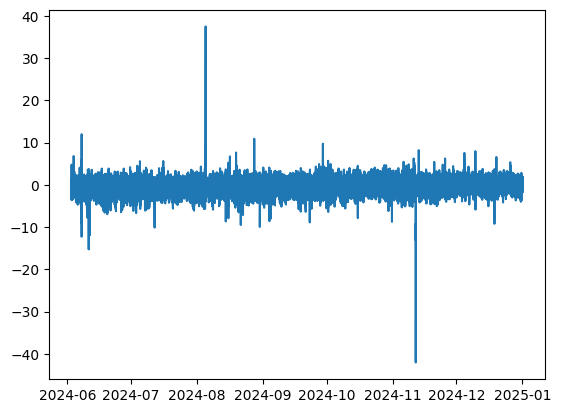

In [400]:
plt.plot(zscore_series)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        4.00000e+00, 4.00000e+00, 1.70000e+01, 1.04000e+02, 6.61800e+03,
        1.82313e+05, 1.15584e+05, 4.94000e+02, 2.30000e+01, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-42.04152138, -39.39067315, -36.73982493, -34.08897671,
        -31.43812848, -28.78728026, -26.13643204, -23.48558382,
        -20.83473559, -18.18388737, -15.53303915, -12.88219092,
        -10.2313427 ,  -7.58049448,  -4.92964626,  -2.27879803,
          0.37205019,   3.02289841,   5.67374664,   8.32459486,
         10.97544308,  13.6262913 ,  16.27713953,  18.92798775,
         21.57883597,  24.2296842 ,  26.88053242,  29.53138064,
         32.18222886,  34.83307709,  37.48392531]),
 <BarContainer object of 30 artists>)

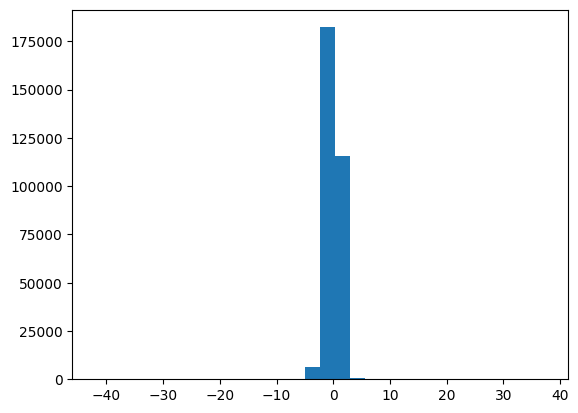

In [401]:
plt.hist(zscore_series, bins=30)

In [402]:
# #Compute normalised difference between the two prices
# normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

# #Compute the average normalised difference
# np.mean(normalised_abs_diff)

In [403]:
# #SETH and ETH Distance: 0.0003968226419110906

# s_eth_distance = 0.0003968226419110906
# w_bitcoin_distance = 0.0006442955592394416

# percentage = s_eth_distance/w_bitcoin_distance * 100
# percentage


In [404]:
# sym1

In [405]:
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# len(price_changes_S2_non_zero)

In [406]:
S1

local_timestamp
2024-06-01 00:00:00    3765.885
2024-06-01 00:01:00    3763.005
2024-06-01 00:02:00    3764.515
2024-06-01 00:03:00    3765.815
2024-06-01 00:04:00    3766.675
                         ...   
2024-12-31 23:55:00    3341.735
2024-12-31 23:56:00    3340.645
2024-12-31 23:57:00    3339.345
2024-12-31 23:58:00    3338.415
2024-12-31 23:59:00    3337.785
Name: eth_mid_price, Length: 308051, dtype: float64

In [425]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Total trades: 2739
Number of profitable trades (proft > 0): 1785
Number of non-profitable trades (proft < 0): 954
Total return €: 2046.72
Total return %: 20.47%
Long spread losses: 646, Short spread losses: 308
Number of Dual-leg profitable trades: 674
Dual leg trade profit rate: 24.61%


In [408]:
#Most profitable trade


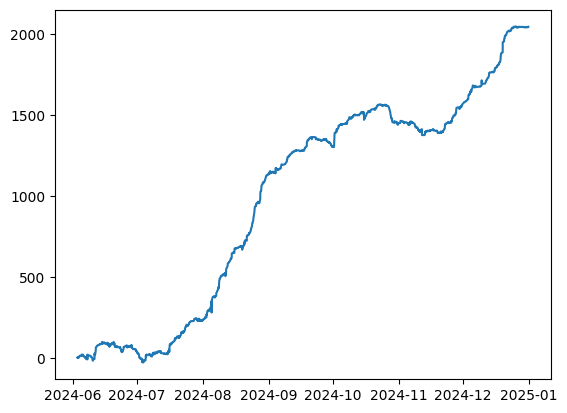

In [409]:
plt.plot(cumulative_profit_series)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.,   3.,   3.,   7.,  18.,  42.,  26.,  24.,  11.,   3.,  22.,
        127., 441., 638., 521., 366., 220.,  95.,  70.,  30.,  19.,   6.,
          5.,   8.,   4.,   4.,   1.,   2.,   1.,   1.,   1.,   2.,   0.,
          0.,   0.,   4.,   2.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-68.72095337, -67.7154291 , -66.70990483, -65.70438056,
        -64.69885629, -63.69333201, -62.68780774, -61.68228347,
        -60.6767592 , -59.67123493, -58.66571066, -57.66018638,
        -56.65466211, -55.64913784, -54.64361357, -53.6380893 ,
        -52.63256502, -51.62704075, -50.62151648, -49.61599221

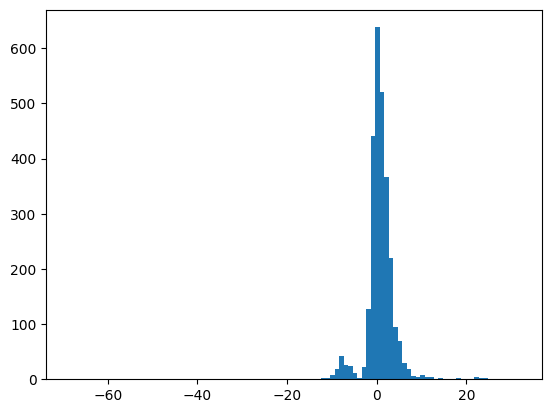

In [410]:
plt.hist(trade_profits, bins=100)

In [411]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -1.9690277918457384
Average trade win:  € 2.198977641814617
Number of negative profits(profits that were less than the transaction cost):  954
Number of positive profits (profits that were greater than the transaction cost):  1785


In [412]:
# #Calculate returns based on the trade profits
# trade_profits = np.array(trade_profits)
# returns = trade_profits/initial_capital * 100

# #Plot the returns
# plt.hist(returns, bins=50, edgecolor='black')
# plt.xlabel('Returns (%)')   
# plt.ylabel('Frequency')
# plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [413]:
# #Calculate percentage price changes for each asset
# price_changes_S1 = np.array(price_changes_S1)

In [414]:
# #Obtain non-zero price changes
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# #Convert price changes to percentage
# price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
# price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

# #Print average price changes
# print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
# print(f"Number of trades: {len(price_changes_S1_non_zero)}")

In [415]:
# percentage_return = cumulative_profit_series[-1]/initial_capital * 100
# print(f"Percentage return: {percentage_return:.2f} %")


# #PROFIT SHOULD BE 0.15 EUR

# plt.figure(figsize=(10,6))
# plt.plot(cumulative_profit_series)
# plt.title('Cumulative PnL')
# plt.xlabel('Time')
# plt.ylabel('PnL (EUR)')
# plt.show()

Trade 1 : 2024-07-01 08:22:00 to 2024-07-01 08:23:00 (loss)


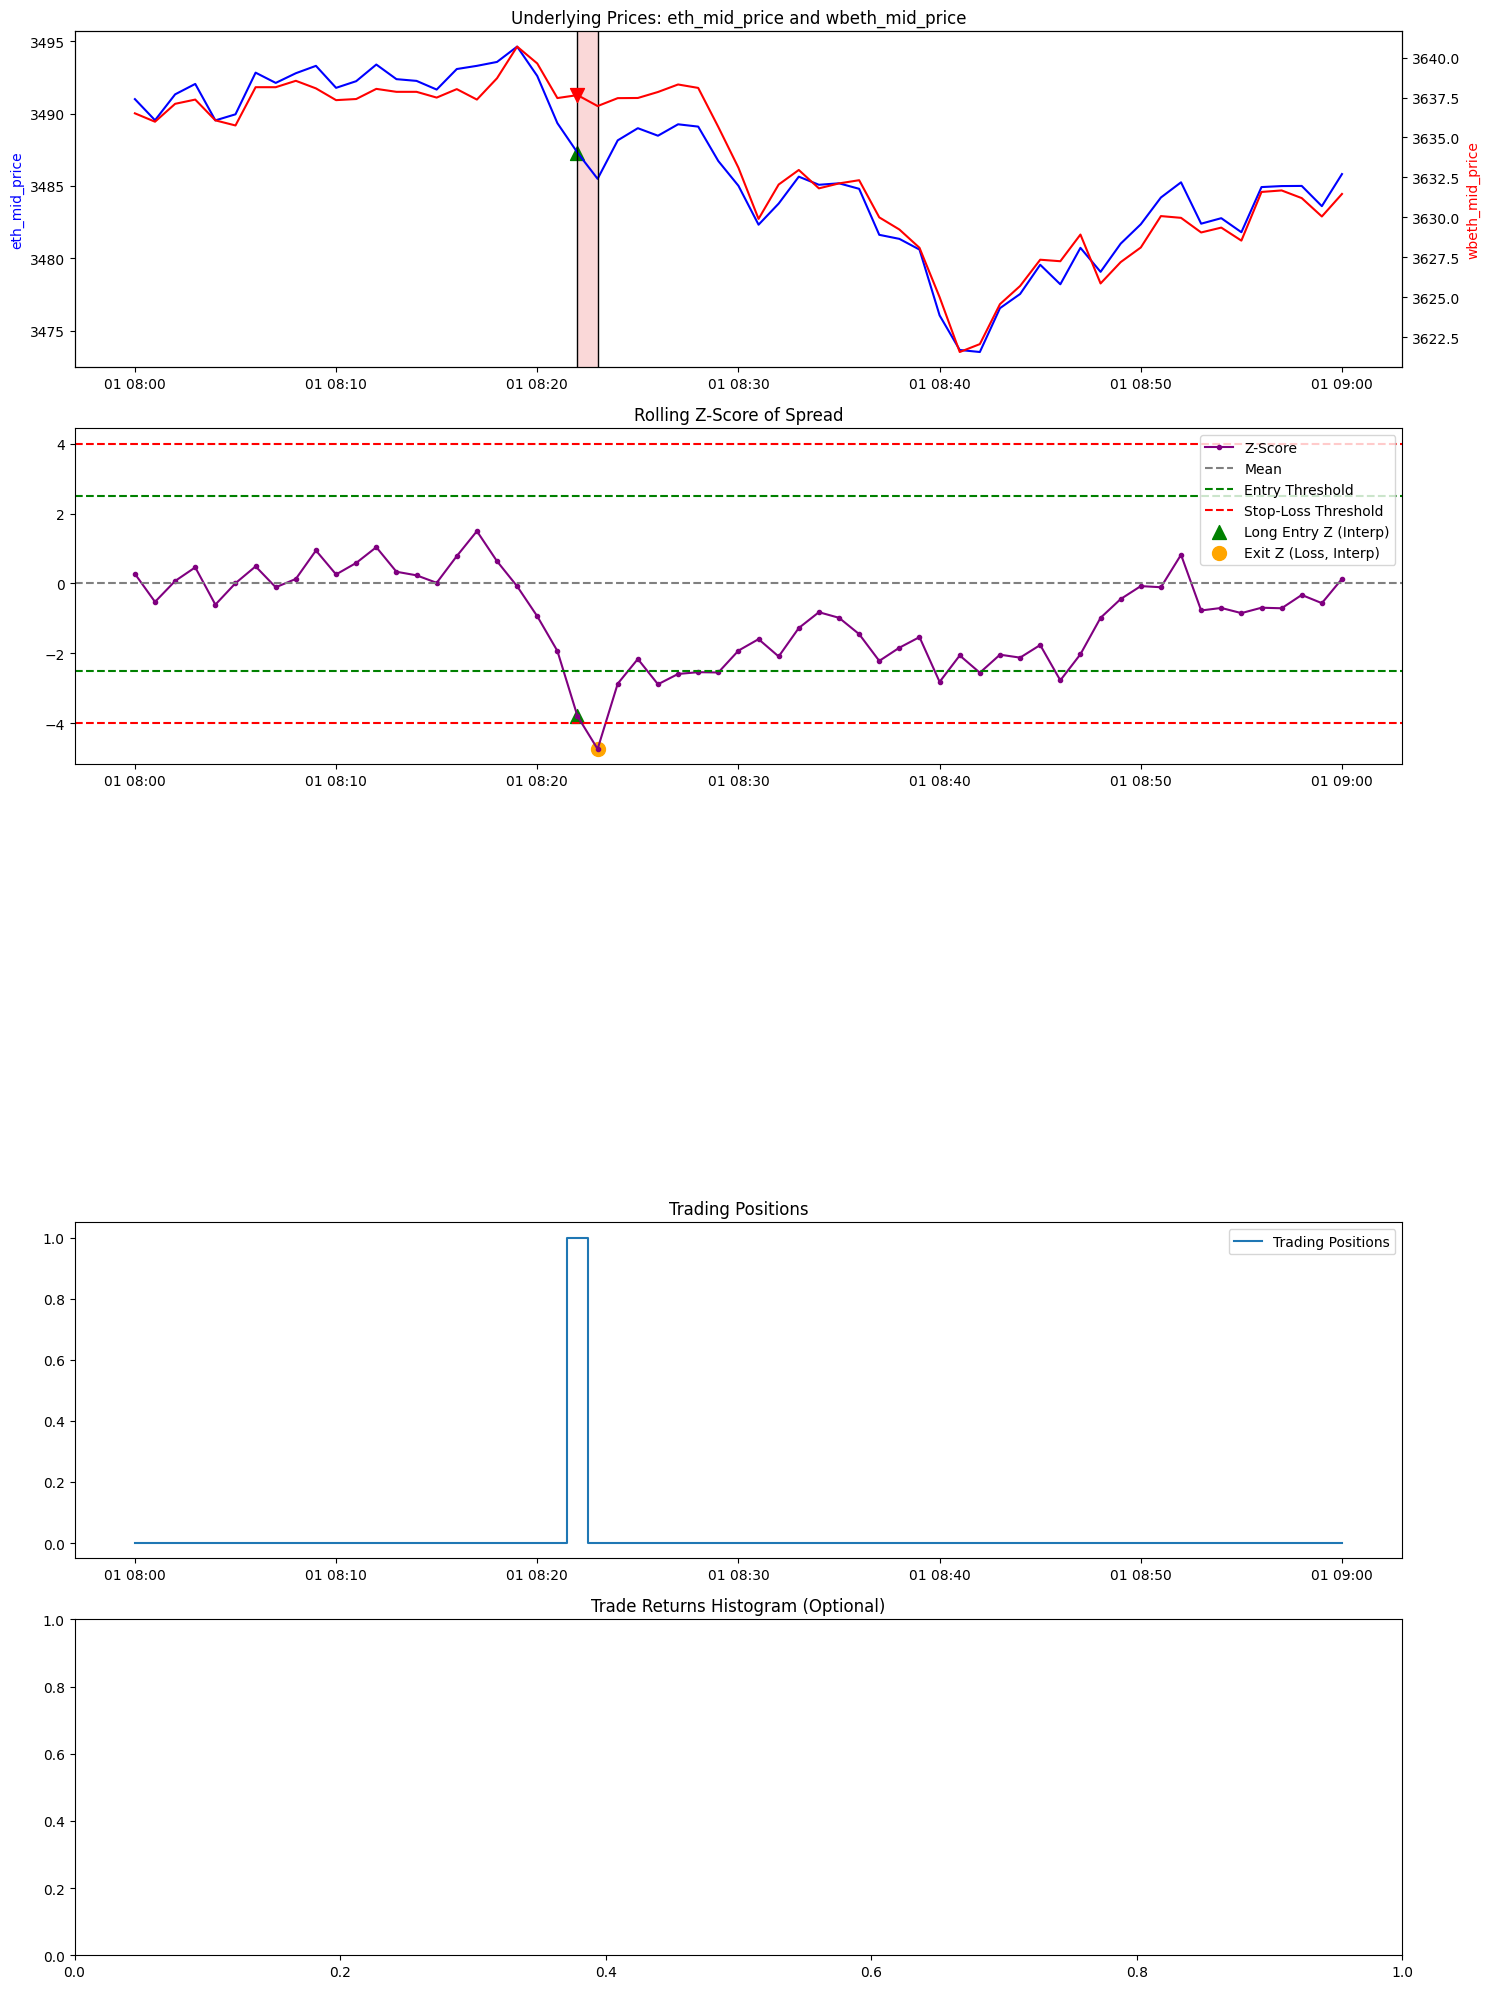

In [416]:
#Plot trading simulation

# window_start = pd.to_datetime('2025-02-01 00:00:00')
# window_end = pd.to_datetime('2025-02-01 2:00:00')


window_start = pd.to_datetime('2024-07-01 08:00:00')
window_end = pd.to_datetime('2024-07-01 09:00:00')


# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [417]:
#Zip trade entries and exits
trade_entries_exits = list(zip(trade_entries, trade_exits))
trade_entries_exits

[({'time': Timestamp('2024-06-03 00:47:00'),
   'S1': np.float64(3769.995),
   'S2': np.float64(3913.315),
   'z': np.float64(4.781949470832841),
   'position': -1},
  {'time': Timestamp('2024-06-03 00:54:00'),
   'S1': np.float64(3771.785),
   'S2': np.float64(3920.93),
   'z': np.float64(-0.4393508435977688),
   'exit_type': 'win'}),
 ({'time': Timestamp('2024-06-03 01:14:00'),
   'S1': np.float64(3787.005),
   'S2': np.float64(3939.505),
   'z': np.float64(-2.872978498458467),
   'position': 1},
  {'time': Timestamp('2024-06-03 01:39:00'),
   'S1': np.float64(3799.675),
   'S2': np.float64(3949.535),
   'z': np.float64(0.027331776058276705),
   'exit_type': 'win'}),
 ({'time': Timestamp('2024-06-03 02:00:00'),
   'S1': np.float64(3807.095),
   'S2': np.float64(3961.505),
   'z': np.float64(-3.605868198829467),
   'position': 1},
  {'time': Timestamp('2024-06-03 02:17:00'),
   'S1': np.float64(3815.225),
   'S2': np.float64(3965.435),
   'z': np.float64(0.35565878152464886),
   'exit

In [418]:
z = 0.1

if z < -0:
    print("Short")

In [419]:


# #Get prices at the start and end of the first trade
# S1_price_start = S1[entry_indices]
# S2_price_start = S2[entry_indices]

# S1_price_end = S1.loc[exit_indices]
# S2_price_end = S2.loc[exit_indices]


# #Calculate the price changes by converting the series to numpy arrays
# S1_price_start = S1_price_start.to_numpy()
# S2_price_start = S2_price_start.to_numpy()

# S1_price_end = S1_price_end.to_numpy()
# S2_price_end = S2_price_end.to_numpy()

# print("BEFORE ALIGNMENT")

# #Make sure the arrays have the same shape
# print(S1_price_start.shape)
# print(S2_price_start.shape)


# print(S1_price_end.shape)
# print(S2_price_end.shape)


# if S1_price_start.shape > S1_price_end.shape:
#     S1_price_start = S1_price_start[:len(S1_price_end)]

# if S2_price_start.shape > S2_price_end.shape:
#     S2_price_start = S2_price_start[:len(S2_price_end)]
 
# print("AFTER ALIGNMENT")

# #Make sure the arrays have the same shape
# print(S1_price_start.shape)
# print(S2_price_start.shape)

# print(S1_price_end.shape)
# print(S2_price_end.shape)

# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start

# #Get percentage price changes
# S1_price_change_percent = S1_price_change/S1_price_start * 100
# S2_price_change_percent = S2_price_change/S2_price_start * 100

# #Get absolute percentage price changes
# S1_price_change_percent_abs = np.abs(S1_price_change_percent)
# S2_price_change_percent_abs = np.abs(S2_price_change_percent)


# print(f"Average absolute S1 price change percent: {np.mean(S1_price_change_percent_abs):.2f}%")
# print(f"Average absolute S2 price change percent: {np.mean(S2_price_change_percent_abs):.2f}%")

# print(f"Average of average absolute price changes: {(np.mean(S1_price_change_percent_abs) + np.mean(S2_price_change_percent_abs))/2:.2f}%")



# # #Get the price changes
# # S1_price_change = S1_price_end - S1_price_start
# # S2_price_change = S2_price_end - S2_price_start


In [420]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [421]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [422]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.19%
Average absolute S2 price change percent: 0.22%
Average of average absolute price changes: 0.21%
